# Logistic Regression

Iker Bali Elizalde A01656437

### Import Relevant Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Import Iris Dataset

In [2]:

# Cargar el conjunto de datos Iris
iris = load_iris()


Select petal width as feature dataset (X) and output y # 1 if Iris virginica, else 0

In [3]:

X = iris.data[:, 3].reshape(-1, 1)  # Columna de ancho de pétalo, y reshape para tener una matriz 2D
# Crear la etiqueta de salida y (1 si es Iris virginica, 0 de lo contrario)
y = (iris.target == 2).astype(int)

## Import Logistic Regression from sklearn and train

Set solver="lbfgs" and random_state=42

In [4]:
# your code

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de regresión logística
clf = LogisticRegression(solver="lbfgs",random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)


LogisticRegression(random_state=42)

Use linspace to create a data set from 0 to 3 with 1000 points

Predict using this new data

Plot both probability (Y[:, 0], Y[:, 1]) the first blue with dashes and the second as a green continous line

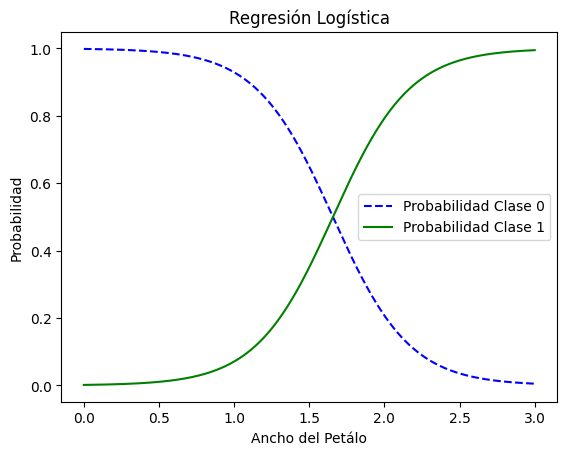

In [5]:
# your code

r=np.linspace(0,3,1000).reshape(-1,1)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict_proba(X_test)

# También puedes hacer predicciones en nuevos datos (X_new)
rpred = clf.predict_proba(r)

plt.figure()
plt.title("Regresión Logística")
plt.xlabel("Ancho del Petálo")
plt.ylabel("Probabilidad")
plt.plot(r,rpred[:,0],"b--",label="Probabilidad Clase 0")
plt.plot(r,rpred[:,1],'g-',label="Probabilidad Clase 1")
plt.legend()
plt.show()

Calculate the decision boundry (x value) if the threshold is set at y[:, 1] > 0.5

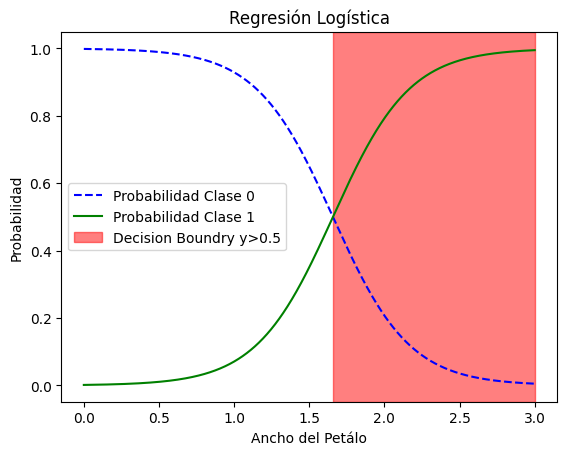

In [33]:

x = r
y = y1=rpred[:,1]
indices = np.where(y > 0.5)
frontera = [x[i] for i in indices]
f=np.array(frontera)


plt.figure()
plt.title("Regresión Logística")
plt.xlabel("Ancho del Petálo")
plt.ylabel("Probabilidad")
plt.plot(r,rpred[:,0],"b--",label="Probabilidad Clase 0")
plt.plot(r,rpred[:,1],'g-',label="Probabilidad Clase 1")

plt.axvspan(f.min(),f.max(),color="red",label="Decision Boundry y>0.5",alpha=0.5)
plt.legend()
plt.show()

Predict a new data point [1.7, 1.5]

In [7]:
# your code

ndp=np.array([1.7,1.5])
ndp2=ndp.reshape(-1,1)
npred=clf.predict(ndp2)
print(f"Dato Original: {ndp}")
print(f"Predicción: {npred}")


Dato Original: [1.7 1.5]
Predicción: [1 0]


## Softmax Regression

Train the Logistic regression now with softmax 

Use now petal length, petal width as feature dataset(X)

Use solver="lbfgs", C=10**10, random_state=42

In [8]:
# your code

X2 = iris.data[:, 2:]
y = iris.target


# your code

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de regresión logística
clf2 = LogisticRegression(solver="lbfgs",random_state=42,C=10*10)

# Entrenar el modelo con los datos de entrenamiento
clf2.fit(X_train, y_train)


LogisticRegression(C=100, random_state=42)

Predict new data

In [9]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = clf2.predict_proba(X_new)

Plot y==0 as "bs" and y==1 as "g^"

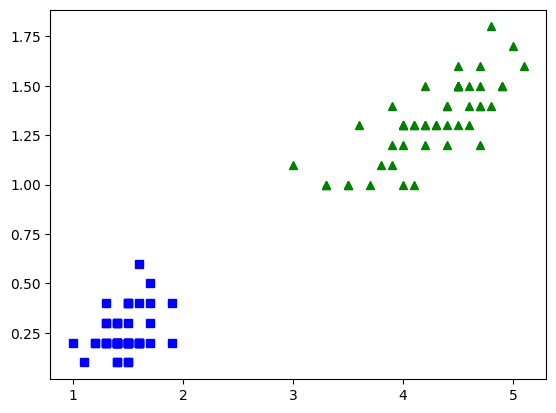

In [10]:
plt.figure()
plt.plot((X2[y==0])[:,0],(X2[y==0])[:,1],"bs")
plt.plot((X2[y==1])[:,0],(X2[y==1])[:,1],"g^")
plt.show()

Train multiclass Logistic Regression

Use now petal length, petal width as feature dataset(X)

Use now the iris target (all the classes) as output(y)

Use multi_class="multinomial",solver="lbfgs", C=10, random_state=42

In [11]:
# your code

X3 = iris.data[:, 2:]  # Use petal length and petal width as features
y3 = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


# Train the logistic regression model
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Calculate the probability and the prediction of the new data set 

In [12]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# your code

y3pred=model.predict(X_new).round(2)

Plot the new dataset y==2 as "g^", y==1 as "bs", and y==0 as "yo"

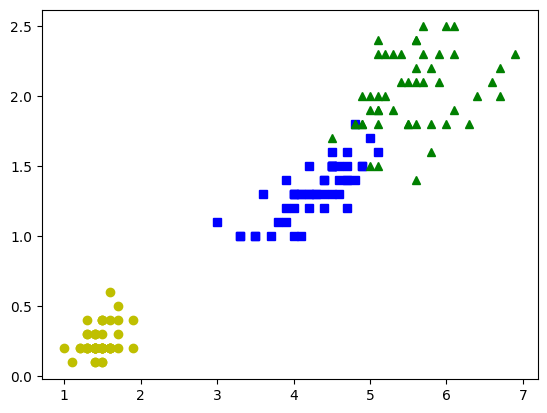

In [13]:
plt.plot((X3[y==1])[:,0],(X3[y==1])[:,1],"bs")
plt.plot((X3[y==2])[:,0],(X3[y==2])[:,1],"g^")
plt.plot((X3[y==0])[:,0],(X3[y==0])[:,1],"yo")
plt.show()

Predict a new point [5, 2]

In [20]:
# your code

# PREDICCION DE UN NUEVO PUNTO
ppp= np.array([5, 2]).reshape(1,-1)
presi = model.predict(ppp)

print(f"Dato Original: {ppp}")
print(f"Predicción: {presi}")

Dato Original: [[5 2]]
Predicción: [2]


Show the probability of the new data point [5, 2]

In [31]:
# your code

print(f'Probabilidad del nuevo punto para cada clase:')
print(model.predict_proba(ppp))

Probabilidad del nuevo punto para cada clase:
[[9.56858586e-07 6.91250086e-02 9.30874035e-01]]
